# 0. Importación de librerías.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# 1. Información sobre los datos.

 ## About dataset

Dataset contains detailed financial and demographic data for 20,000 individuals, focusing on income, expenses, and potential savings across various categories. The data aims to provide insights into personal financial management and spending patterns.

**Income & Demographics:**

- Income: Monthly income in currency units.
- Age: Age of the individual.
- Dependents: Number of dependents supported by the individual.
- Occupation: Type of employment or job role.
- City_Tier: A categorical variable representing the living area tier (e.g., Tier 1, Tier 2).

**Monthly Expenses:**

- Categories like Rent, Loan_Repayment, Insurance, Groceries, Transport, Eating_Out, Entertainment, Utilities, Healthcare, Education, and Miscellaneous record various monthly expenses.

**Financial Goals & Savings:**

- Desired_Savings_Percentage and Desired_Savings: Targets for monthly savings.
- Disposable_Income: Income remaining after all expenses are accounted for.

**Potential Savings:**

- Includes estimates of potential savings across different spending areas such as Groceries, Transport, Eating_Out, Entertainment, Utilities, Healthcare, Education, and Miscellaneous.

## Sobre el conjunto de datos

El conjunto de datos contiene información detallada financiera y demográfica de 20,000 personas, centrada en ingresos, gastos y posibles ahorros en varias categorías. El objetivo es proporcionar información sobre la gestión financiera personal y los patrones de gasto.

**Ingresos y demografía:**

- **Income:** Ingreso mensual en unidades monetarias.  
- **Age:** Edad de la persona.  
- **Dependents:** Número de dependientes a cargo de la persona.  
- **Occupation:** Tipo de empleo o rol laboral.  
- **City_Tier:** Variable categórica que representa el nivel del área de residencia (por ejemplo, Nivel 1, Nivel 2).  

**Gastos mensuales:**

- Categorías como Alquiler, Reembolso de préstamos, Seguros, Comestibles, Transporte, Comer fuera, Entretenimiento, Servicios, Atención médica, Educación y Misceláneos registran diversos gastos mensuales.  

**Objetivos financieros y ahorros:**

- **Desired_Savings_Percentage** y **Desired_Savings:** Objetivos para ahorros mensuales.  
- **Disposable_Income:** Ingreso disponible después de contabilizar todos los gastos.  

**Ahorros potenciales:**

- Incluye estimaciones de ahorros potenciales en diferentes áreas de gasto, como Comestibles, Transporte, Comer fuera, Entretenimiento, Servicios, Atención médica, Educación y Misceláneos.  

In [3]:
datos = pd.read_csv("data.csv")

In [4]:
datos.shape

(20000, 27)

In [5]:
datos.head(10)

,Income,Age,Dependents,Occupation,City_Tier,Rent,Loan_Repayment,Insurance,Groceries,Transport,...,Desired_Savings,Disposable_Income,Potential_Savings_Groceries,Potential_Savings_Transport,Potential_Savings_Eating_Out,Potential_Savings_Entertainment,Potential_Savings_Utilities,Potential_Savings_Healthcare,Potential_Savings_Education,Potential_Savings_Miscellaneous
0,44637.249636,49,0,Self_Employed,Tier_1,13391.174891,0.000000,2206.490129,6658.768341,2636.970696,...,6200.537192,11265.627707,1685.696222,328.895281,465.769172,195.151320,678.292859,67.682471,0.000000,85.735517
1,26858.596592,34,2,Retired,Tier_2,5371.719318,0.000000,869.522617,2818.444460,1543.018778,...,1923.176434,9676.818733,540.306561,119.347139,141.866089,234.131168,286.668408,6.603212,56.306874,97.388606
2,50367.605084,35,1,Student,Tier_3,7555.140763,4612.103386,2201.800050,6313.222081,3221.396403,...,7050.360422,13891.450624,1466.073984,473.549752,410.857129,459.965256,488.383423,7.290892,106.653597,138.542422
3,101455.600247,21,0,Self_Employed,Tier_3,15218.340037,6809.441427,4889.418087,14690.149363,7106.130005,...,16694.965136,31617.953615,1875.932770,762.020789,1241.017448,320.190594,1389.815033,193.502754,0.000000,296.041183
4,24875.283548,52,4,Professional,Tier_2,4975.056710,3112.609398,635.907170,3034.329665,1276.155163,...,1874.099434,6265.700532,788.953124,68.160766,61.712505,187.173750,194.117130,47.294591,67.388120,96.557076
5,24875.610267,57,4,Self_Employed,Tier_2,4975.122053,0.000000,1038.230996,3250.067756,1760.164812,...,1478.666359,7599.265300,957.619116,521.683848,135.925865,148.952326,86.567256,13.143683,33.961843,96.675925
6,106119.692762,53,0,Self_Employed,Tier_2,21223.938552,0.000000,4360.202710,12790.390693,6345.738036,...,18399.564592,41595.325723,2799.234658,912.958599,438.009790,541.702363,838.299989,111.857588,0.000000,409.453143
7,55431.341508,40,1,Professional,Tier_2,11086.268302,8307.702220,1755.439820,8194.482410,3353.001888,...,6636.413893,8465.944597,1059.499640,838.163700,466.179258,327.902059,353.411650,92.739538,116.121727,71.520963
8,20606.733121,32,4,Retired,Tier_1,6182.019936,3562.488826,1018.589940,3066.867220,1170.790666,...,362.917872,362.917872,822.974023,212.998059,85.489142,97.812946,252.344383,9.984250,59.957848,80.754353
9,46304.790235,30,1,Student,Tier_2,9260.958047,0.000000,2130.254825,5065.627032,2500.054847,...,5615.104745,15690.256276,962.019888,380.272262,598.882904,188.311642,793.644470,34.873044,39.738841,203.146675


In [6]:
ocupaciones_unicas = datos['Occupation'].unique()
print(ocupaciones_unicas)

['Self_Employed' 'Retired' 'Student' 'Professional']


In [7]:
lugares_india = datos['City_Tier'].unique()
print(lugares_india)

['Tier_1' 'Tier_2' 'Tier_3']


In [8]:
datos.isnull().sum()

Income                             0
Age                                0
Dependents                         0
Occupation                         0
City_Tier                          0
Rent                               0
Loan_Repayment                     0
Insurance                          0
Groceries                          0
Transport                          0
Eating_Out                         0
Entertainment                      0
Utilities                          0
Healthcare                         0
Education                          0
Miscellaneous                      0
Desired_Savings_Percentage         0
Desired_Savings                    0
Disposable_Income                  0
Potential_Savings_Groceries        0
Potential_Savings_Transport        0
Potential_Savings_Eating_Out       0
Potential_Savings_Entertainment    0
Potential_Savings_Utilities        0
Potential_Savings_Healthcare       0
Potential_Savings_Education        0
Potential_Savings_Miscellaneous    0
d

El dataset no tiene valores nulos.

In [9]:
# Columnas numéricas
columnas_numericas = datos.select_dtypes(include=['number']).columns
print("Columnas numéricas:", columnas_numericas)

# Columnas categóricas
columnas_categoricas = datos.select_dtypes(include=['object']).columns
print("Columnas categóricas:", columnas_categoricas)

Columnas numéricas: Index(['Income', 'Age', 'Dependents', 'Rent', 'Loan_Repayment', 'Insurance',
       'Groceries', 'Transport', 'Eating_Out', 'Entertainment', 'Utilities',
       'Healthcare', 'Education', 'Miscellaneous',
       'Desired_Savings_Percentage', 'Desired_Savings', 'Disposable_Income',
       'Potential_Savings_Groceries', 'Potential_Savings_Transport',
       'Potential_Savings_Eating_Out', 'Potential_Savings_Entertainment',
       'Potential_Savings_Utilities', 'Potential_Savings_Healthcare',
       'Potential_Savings_Education', 'Potential_Savings_Miscellaneous'],
      dtype='object')
Columnas categóricas: Index(['Occupation', 'City_Tier'], dtype='object')


In [10]:
datos[columnas_numericas] = datos[columnas_numericas].round(2)
datos.head(10)

,Income,Age,Dependents,Occupation,City_Tier,Rent,Loan_Repayment,Insurance,Groceries,Transport,...,Desired_Savings,Disposable_Income,Potential_Savings_Groceries,Potential_Savings_Transport,Potential_Savings_Eating_Out,Potential_Savings_Entertainment,Potential_Savings_Utilities,Potential_Savings_Healthcare,Potential_Savings_Education,Potential_Savings_Miscellaneous
0,44637.25,49,0,Self_Employed,Tier_1,13391.17,0.00,2206.49,6658.77,2636.97,...,6200.54,11265.63,1685.70,328.90,465.77,195.15,678.29,67.68,0.00,85.74
1,26858.60,34,2,Retired,Tier_2,5371.72,0.00,869.52,2818.44,1543.02,...,1923.18,9676.82,540.31,119.35,141.87,234.13,286.67,6.60,56.31,97.39
2,50367.61,35,1,Student,Tier_3,7555.14,4612.10,2201.80,6313.22,3221.40,...,7050.36,13891.45,1466.07,473.55,410.86,459.97,488.38,7.29,106.65,138.54
3,101455.60,21,0,Self_Employed,Tier_3,15218.34,6809.44,4889.42,14690.15,7106.13,...,16694.97,31617.95,1875.93,762.02,1241.02,320.19,1389.82,193.50,0.00,296.04
4,24875.28,52,4,Professional,Tier_2,4975.06,3112.61,635.91,3034.33,1276.16,...,1874.10,6265.70,788.95,68.16,61.71,187.17,194.12,47.29,67.39,96.56
5,24875.61,57,4,Self_Employed,Tier_2,4975.12,0.00,1038.23,3250.07,1760.16,...,1478.67,7599.27,957.62,521.68,135.93,148.95,86.57,13.14,33.96,96.68
6,106119.69,53,0,Self_Employed,Tier_2,21223.94,0.00,4360.20,12790.39,6345.74,...,18399.56,41595.33,2799.23,912.96,438.01,541.70,838.30,111.86,0.00,409.45
7,55431.34,40,1,Professional,Tier_2,11086.27,8307.70,1755.44,8194.48,3353.00,...,6636.41,8465.94,1059.50,838.16,466.18,327.90,353.41,92.74,116.12,71.52
8,20606.73,32,4,Retired,Tier_1,6182.02,3562.49,1018.59,3066.87,1170.79,...,362.92,362.92,822.97,213.00,85.49,97.81,252.34,9.98,59.96,80.75
9,46304.79,30,1,Student,Tier_2,9260.96,0.00,2130.25,5065.63,2500.05,...,5615.10,15690.26,962.02,380.27,598.88,188.31,793.64,34.87,39.74,203.15


Redondeamos los datos a dos decimales para que su comprensión sea más fácil.

In [17]:
datos.to_csv("data_limpio.csv", index=False)

### Gráficas de interés

#### Distribución de columnas numéricas.

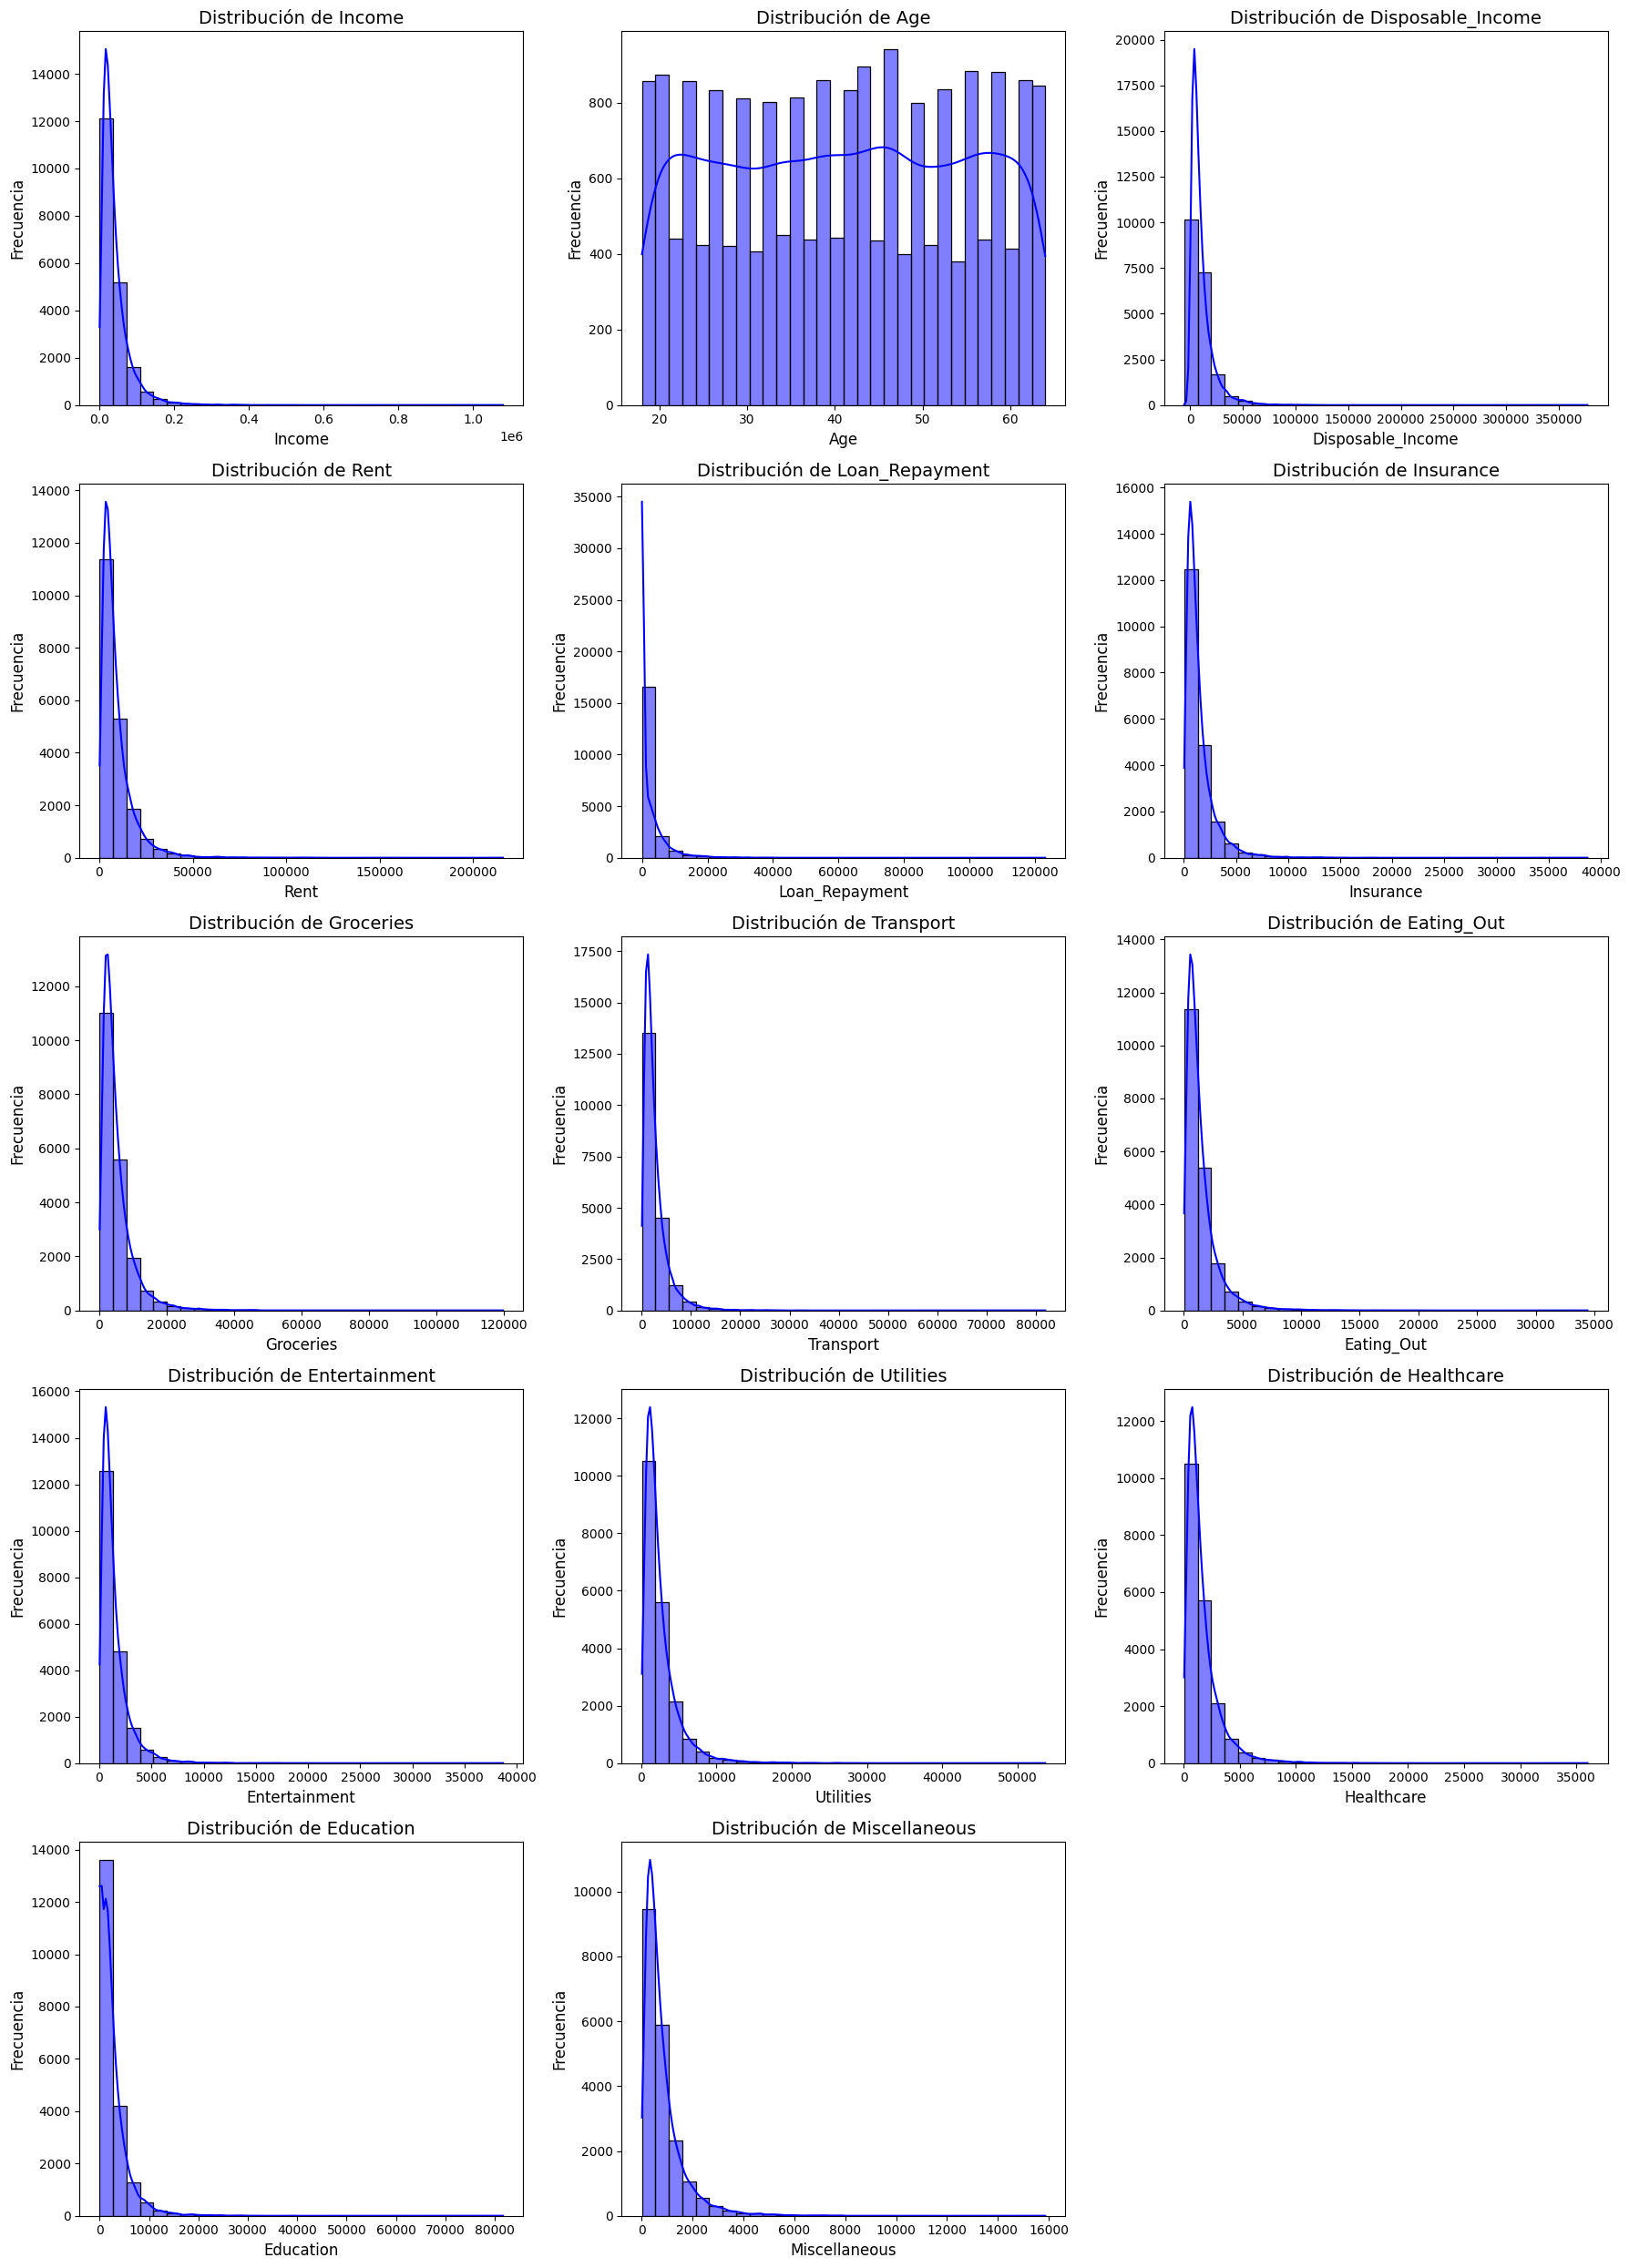

In [11]:
# Lista de columnas numéricas para analizar
numeric_columns = ['Income', 'Age', 'Disposable_Income'] + ['Rent', 'Loan_Repayment', 'Insurance', 
                                                            'Groceries', 'Transport', 'Eating_Out', 
                                                            'Entertainment', 'Utilities', 'Healthcare', 
                                                            'Education', 'Miscellaneous']

# Calcular el número de filas necesario
num_columns = 3  # Número de columnas por fila
num_rows = math.ceil(len(numeric_columns) / num_columns)

# Crear la figura y los subplots
fig, axes = plt.subplots(num_rows, num_columns, figsize=(18, 5 * num_rows))

# Asegurarse de que axes sea un arreglo 1D para recorrerlo fácilmente
axes = axes.flatten()

# Crear un histograma para cada columna
for i, column in enumerate(numeric_columns):
    sns.histplot(data=datos, x=column, kde=True, bins=30, ax=axes[i], color='blue')
    axes[i].set_title(f'Distribución de {column}', fontsize=14)
    axes[i].set_xlabel(column, fontsize=12)
    axes[i].set_ylabel('Frecuencia', fontsize=12)

# Ocultar los subplots vacíos si sobran
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

#### Boxplot para detectar outliers.

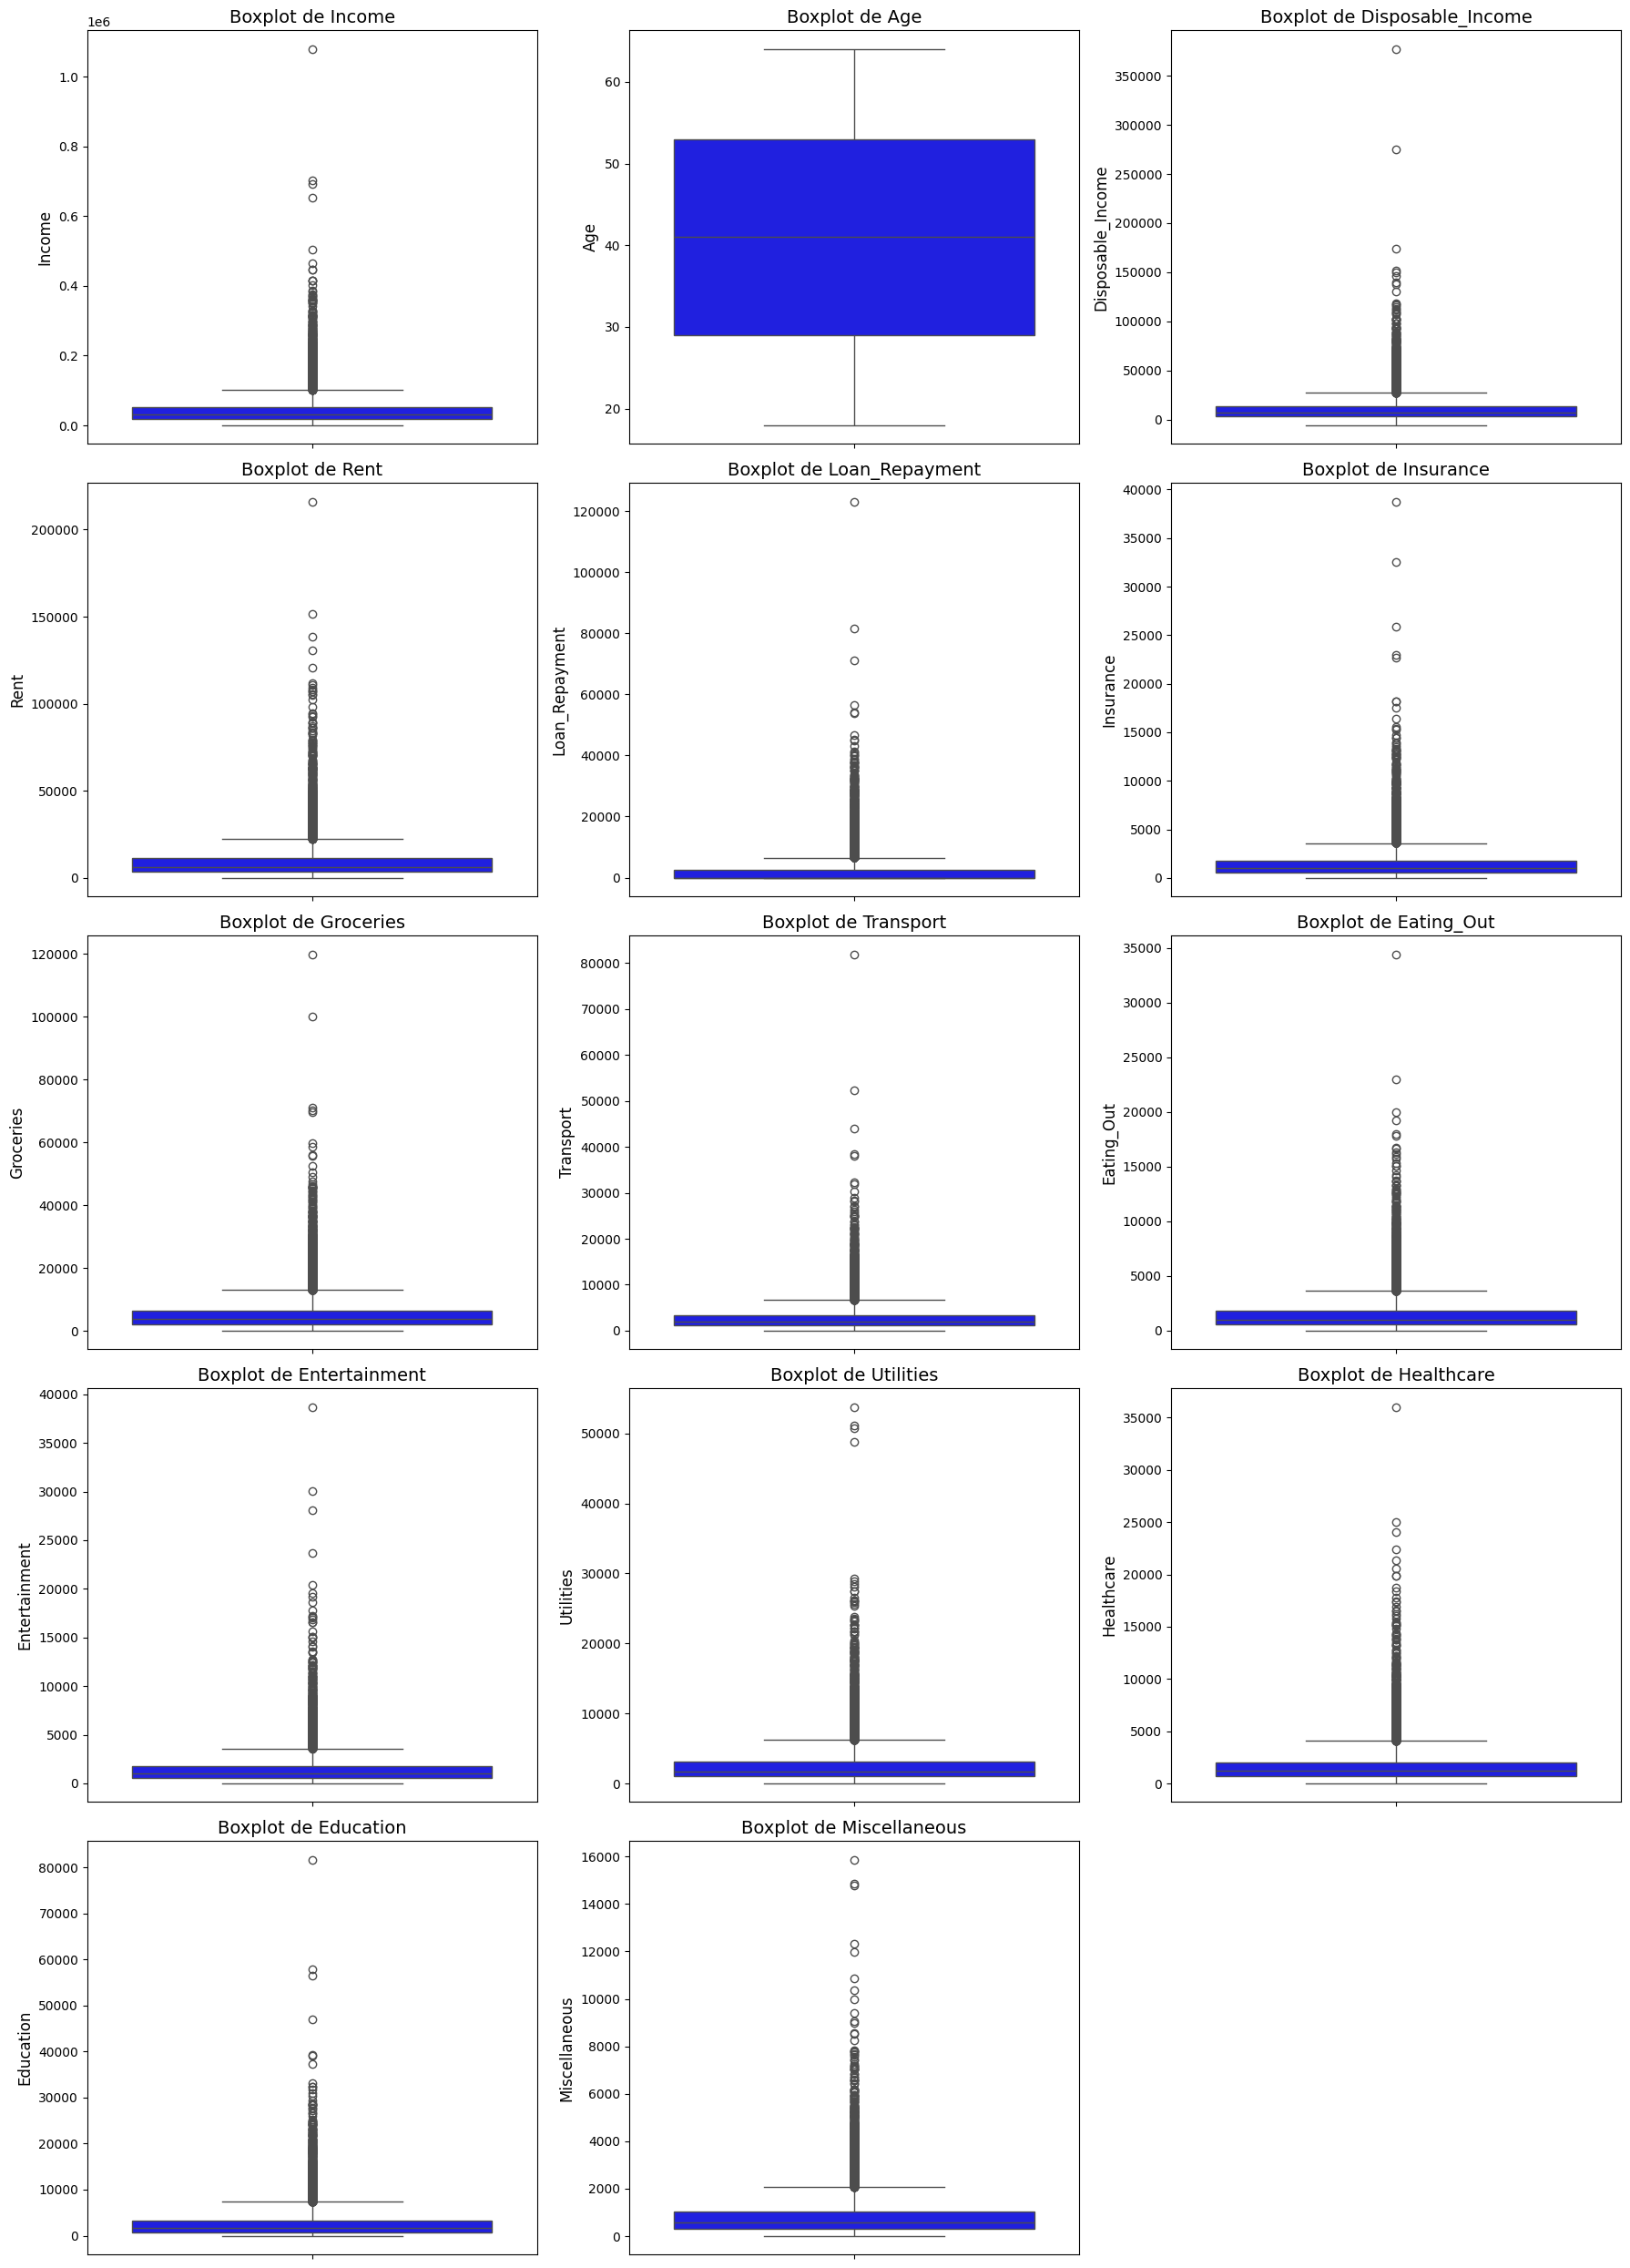

In [12]:
# Calcular el número de filas necesario
num_rows = math.ceil(len(numeric_columns) / num_columns)

# Crear la figura y los subplots
fig, axes = plt.subplots(num_rows, num_columns, figsize=(18, 5 * num_rows))

# Asegurarse de que axes sea un arreglo 1D para recorrerlo fácilmente
axes = axes.flatten()

# Crear un boxplot para cada columna
for i, column in enumerate(numeric_columns):
    sns.boxplot(data=datos, y=column, ax=axes[i], color='blue')
    axes[i].set_title(f'Boxplot de {column}', fontsize=14)
    axes[i].set_ylabel(column, fontsize=12)

# Ocultar los subplots vacíos si sobran
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

Dado que son datos reales de personas de la India, dejamos los outliers ya que son importantes para el análisis posterior.

#### Matriz de correlación

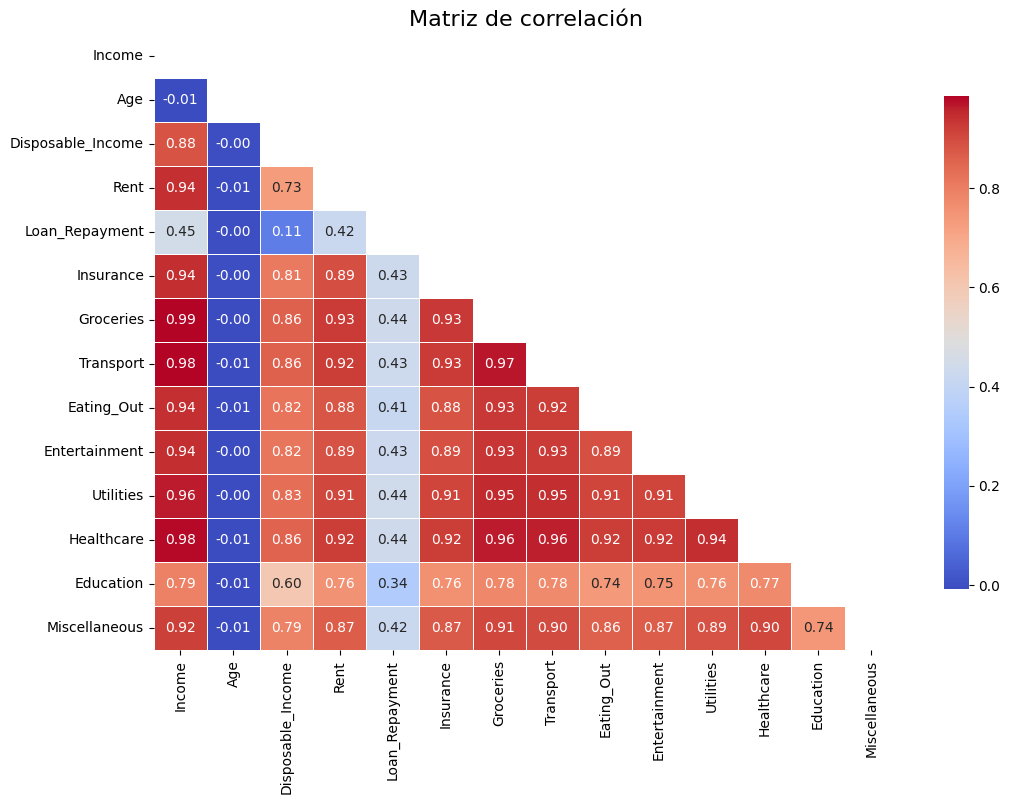

In [13]:
# Calcular la matriz de correlación
correlation_matrix = datos[numeric_columns].corr()

# Crear una máscara para la parte superior de la matriz
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Configurar el gráfico
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Matriz de correlación', fontsize=16)
plt.show()

#### Comparaciones por columnas categóricas

##### 1. Income y Disposable_Income según City_Tier

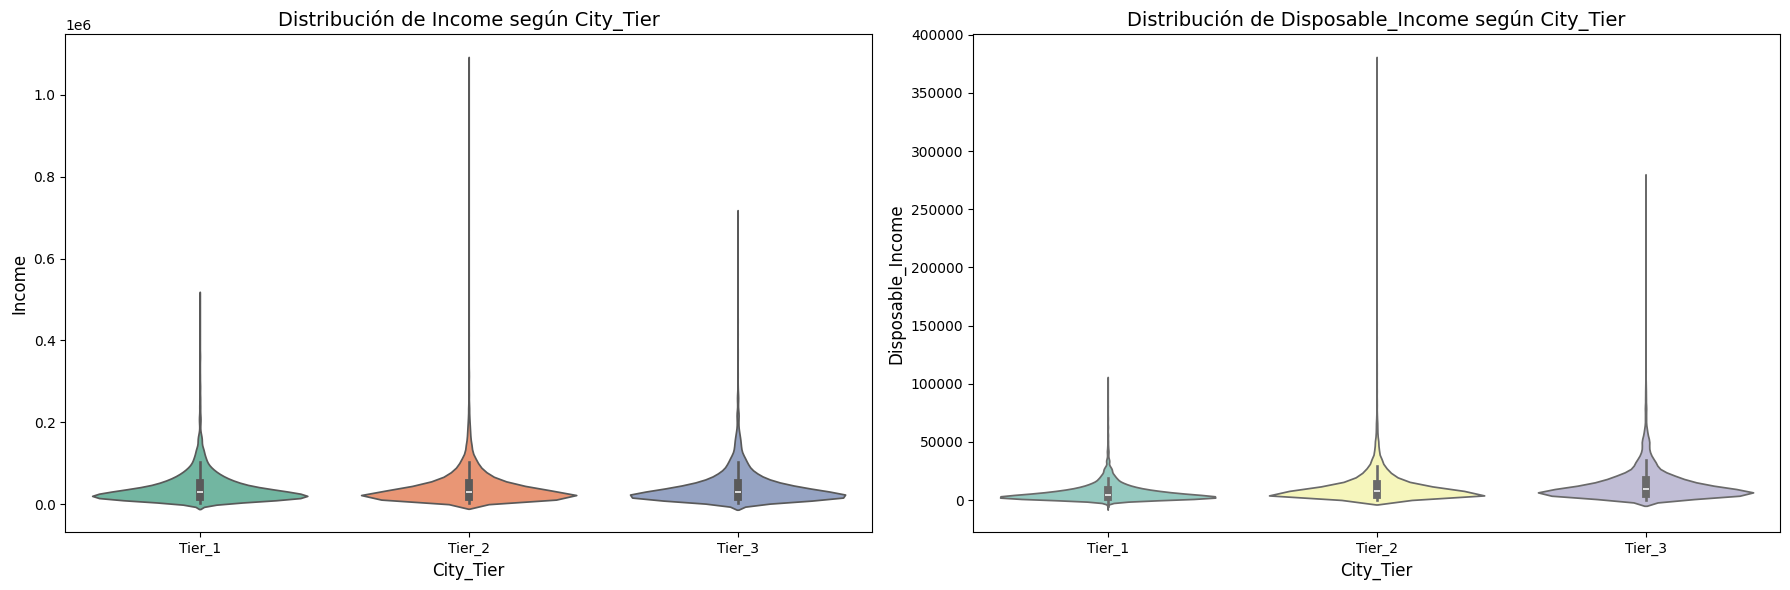

In [14]:
# Lista de gráficos a crear
plots = [
    {'x': 'City_Tier', 'y': 'Income', 'palette': 'Set2', 'title': 'Distribución de Income según City_Tier'},
    {'x': 'City_Tier', 'y': 'Disposable_Income', 'palette': 'Set3', 'title': 'Distribución de Disposable_Income según City_Tier'},
]

# Configuración de subplots: filas de 3 columnas
num_columns = 2
num_rows = -(-len(plots) // num_columns)  # Calcular número de filas necesarias
fig, axes = plt.subplots(num_rows, num_columns, figsize=(18, 6 * num_rows))

# Asegurar que axes sea un arreglo 1D para iterar fácilmente
axes = axes.flatten()

# Generar cada gráfico
for i, plot in enumerate(plots):
    sns.violinplot(data=datos, x=plot['x'], y=plot['y'], palette=plot['palette'], ax=axes[i])
    axes[i].set_title(plot['title'], fontsize=14)
    axes[i].set_xlabel(plot['x'], fontsize=12)
    axes[i].set_ylabel(plot['y'], fontsize=12)

# Ocultar subplots vacíos si sobran
for j in range(len(plots), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

Observamos que los mayores ingresos son de las personas que viven en zonas Tier 2, y, también son las personas que más dinero tienen después de contabilizar todos los gatos.

##### 2. Income según occupation.

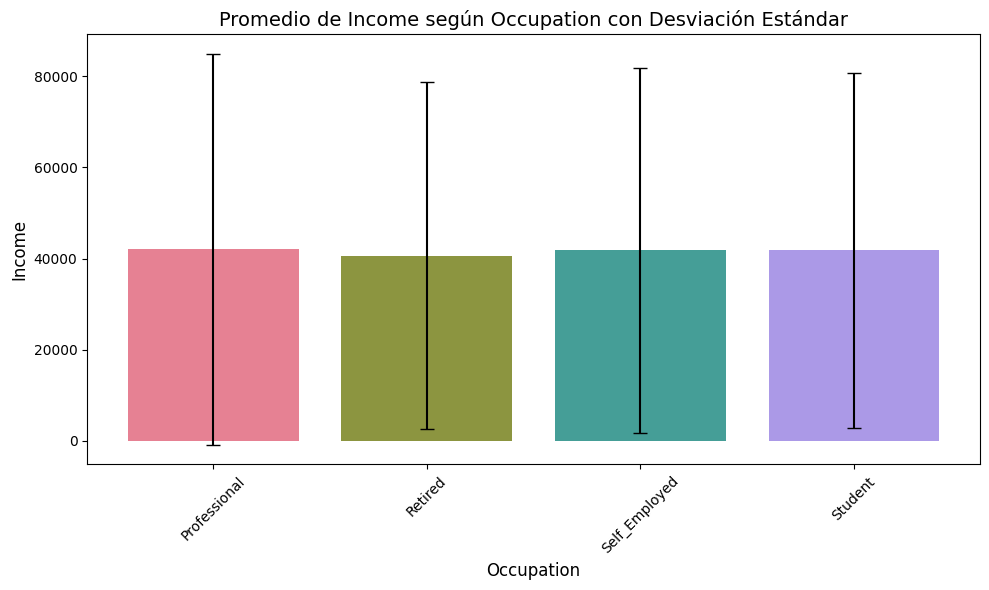

In [15]:
# Calcular la media y desviación estándar para cada 'Occupation'
occupation_stats = datos.groupby('Occupation')['Income'].agg(['mean', 'std']).reset_index()

# Crear gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=occupation_stats, x='Occupation', y='mean', palette='husl')

# Añadir barras de error (desviación estándar)
plt.errorbar(x=np.arange(len(occupation_stats)), y=occupation_stats['mean'], 
             yerr=occupation_stats['std'], fmt='none', c='black', capsize=5)

# Configurar el gráfico
plt.title('Promedio de Income según Occupation con Desviación Estándar', fontsize=14)
plt.xticks(rotation=45)
plt.xlabel('Occupation', fontsize=12)
plt.ylabel('Income', fontsize=12)
plt.tight_layout()
plt.show()

#### Gastos

In [16]:
# Definir las categorías de gasto
categories = ['Groceries', 'Transport', 'Eating_Out', 'Entertainment', 'Utilities', 'Healthcare', 'Education', 'Miscellaneous']

# Crear gráfico de barras para visualizar los porcentajes de gasto en las categorías
category_percentages = [f'{category}_percentage' for category in categories]
mean_percentages = datos[category_percentages].mean()

# Visualizar los porcentajes medios de gasto en las categorías
plt.figure(figsize=(12, 6))
sns.barplot(x=mean_percentages.index, y=mean_percentages.values, palette='viridis')

# Ajustes del gráfico
plt.title('Porcentaje Promedio de Gasto por Categoría sobre el Ingreso Total', fontsize=14)
plt.xlabel('Categoría de Gasto', fontsize=12)
plt.ylabel('Porcentaje sobre el Ingreso', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas para mayor legibilidad
plt.tight_layout()  # Ajustar el diseño para que las etiquetas no se solapen
plt.show()

KeyError: "None of [Index(['Groceries_percentage', 'Transport_percentage', 'Eating_Out_percentage',\n       'Entertainment_percentage', 'Utilities_percentage',\n       'Healthcare_percentage', 'Education_percentage',\n       'Miscellaneous_percentage'],\n      dtype='object')] are in the [columns]"

<Figure size 1400x800 with 0 Axes>

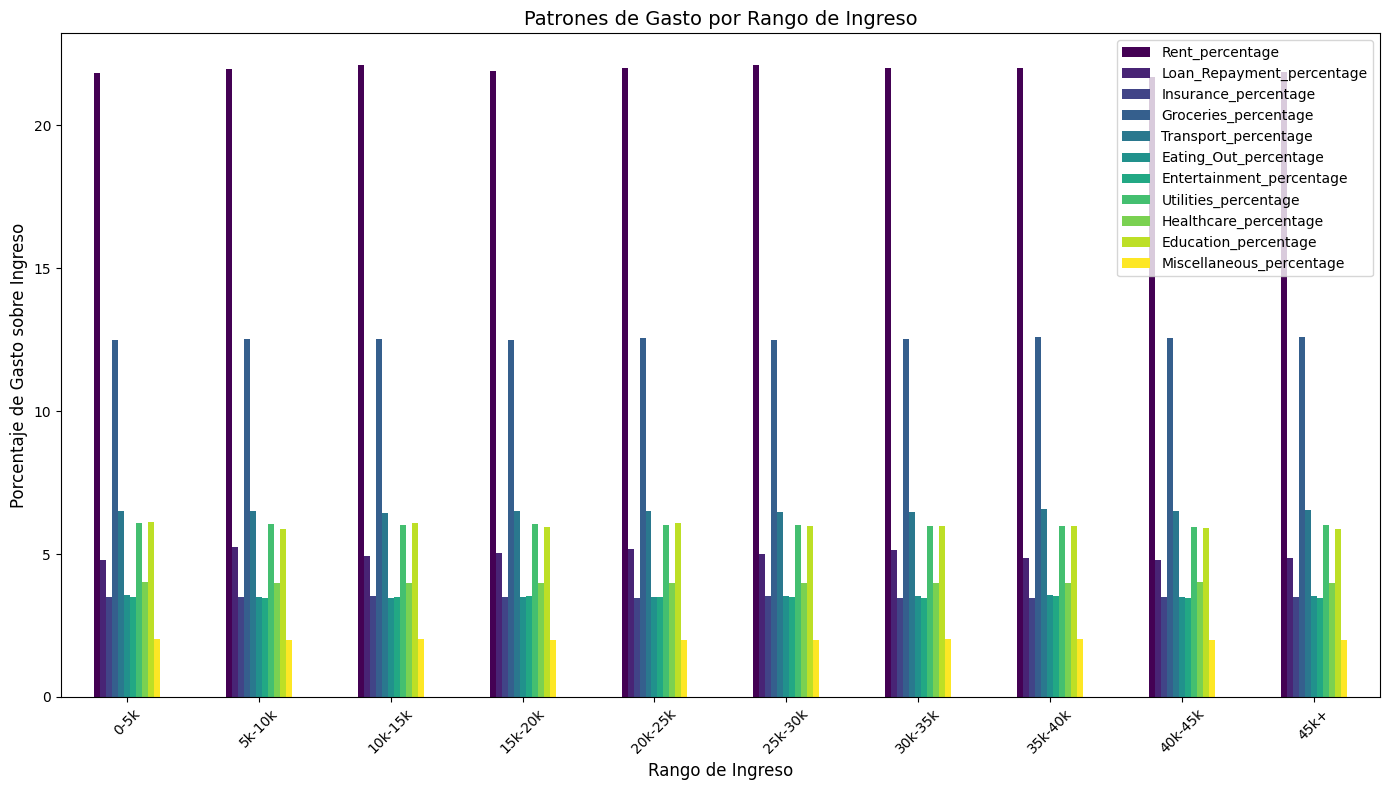

In [56]:
# Crear rangos de ingreso para comparar patrones de gasto
bins = [0, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000]
labels = ['0-5k', '5k-10k', '10k-15k', '15k-20k', '20k-25k', '25k-30k', '30k-35k', '35k-40k', '40k-45k', '45k+']
datos['Income_Range'] = pd.cut(datos['Income'], bins=bins, labels=labels)

# Crear un DataFrame para almacenar los porcentajes de gasto por rango de ingreso
income_range_percentages = datos.groupby('Income_Range')[category_percentages].mean()

# Visualizar los porcentajes de gasto por rango de ingreso
plt.figure(figsize=(14, 8))
income_range_percentages.plot(kind='bar', stacked=False, colormap='viridis', figsize=(14, 8))
plt.title('Patrones de Gasto por Rango de Ingreso', fontsize=14)
plt.xlabel('Rango de Ingreso', fontsize=12)
plt.ylabel('Porcentaje de Gasto sobre Ingreso', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Ahorros

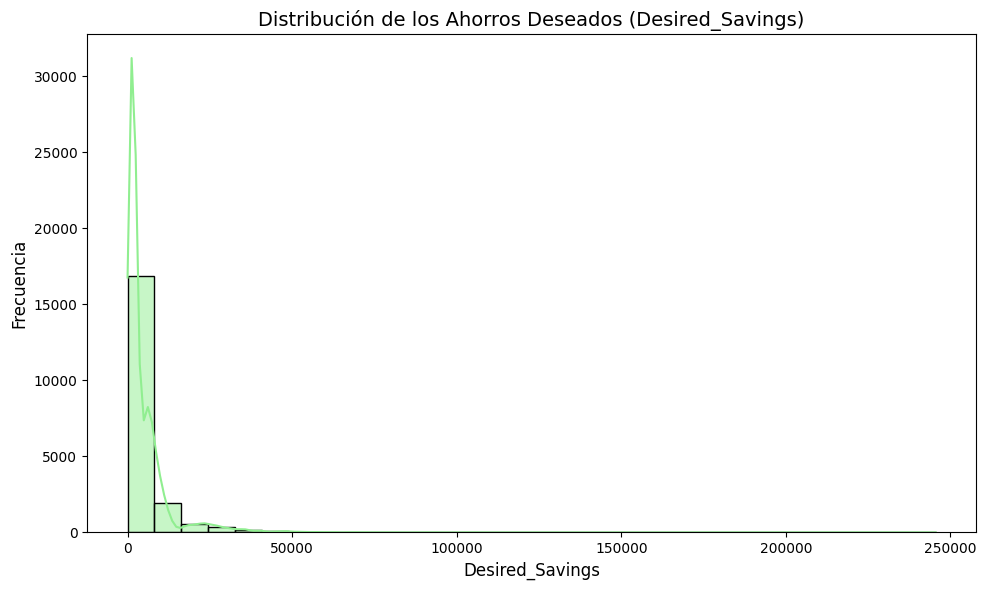

In [51]:
plt.figure(figsize=(10, 6))
sns.histplot(datos['Desired_Savings'], kde=True, color='lightgreen', bins=30)
plt.title('Distribución de los Ahorros Deseados (Desired_Savings)', fontsize=14)
plt.xlabel('Desired_Savings', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.tight_layout()
plt.show()

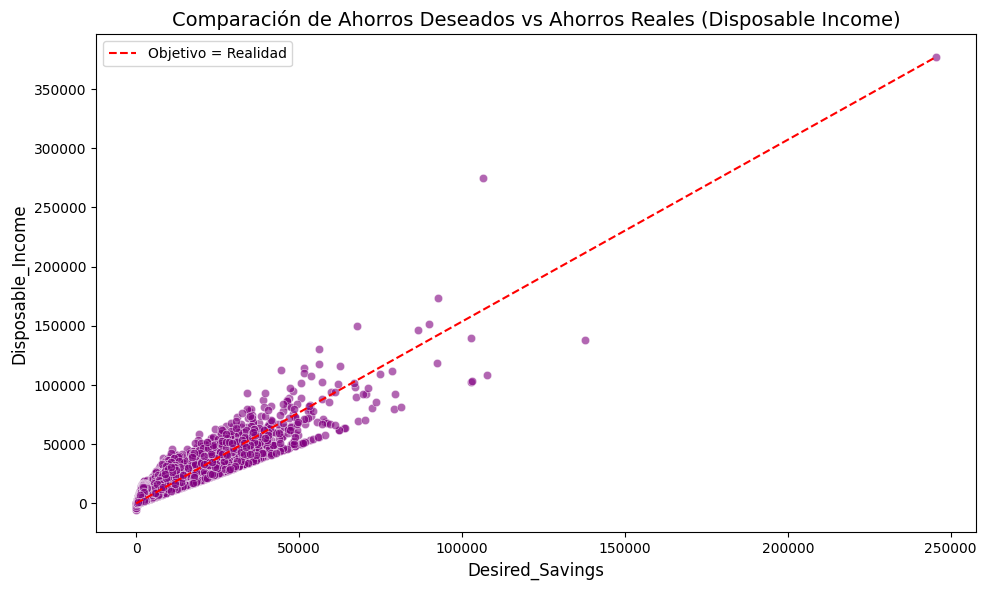

In [52]:
# Crear gráfico de dispersión para comparar Desired_Savings vs Disposable_Income
plt.figure(figsize=(10, 6))
sns.scatterplot(x=datos['Desired_Savings'], y=datos['Disposable_Income'], color='purple', alpha=0.6)
plt.plot([0, max(datos['Desired_Savings'])], [0, max(datos['Disposable_Income'])], color='red', linestyle='--', label='Objetivo = Realidad')
plt.title('Comparación de Ahorros Deseados vs Ahorros Reales (Disposable Income)', fontsize=14)
plt.xlabel('Desired_Savings', fontsize=12)
plt.ylabel('Disposable_Income', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

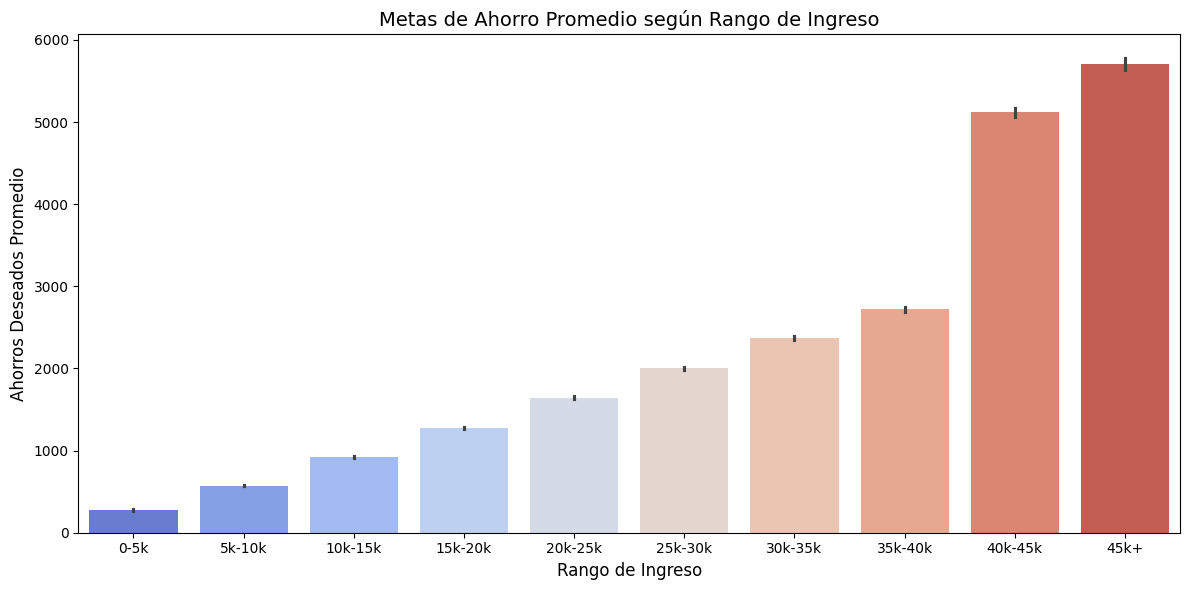

In [53]:
# Crear rangos de ingreso para comparar los objetivos de ahorro
bins = [0, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000]
labels = ['0-5k', '5k-10k', '10k-15k', '15k-20k', '20k-25k', '25k-30k', '30k-35k', '35k-40k', '40k-45k', '45k+']
datos['Income_Range'] = pd.cut(datos['Income'], bins=bins, labels=labels)

# Crear gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x='Income_Range', y='Desired_Savings', data=datos, palette='coolwarm')
plt.title('Metas de Ahorro Promedio según Rango de Ingreso', fontsize=14)
plt.xlabel('Rango de Ingreso', fontsize=12)
plt.ylabel('Ahorros Deseados Promedio', fontsize=12)
plt.tight_layout()
plt.show()

#### Segmentación y agrupación.

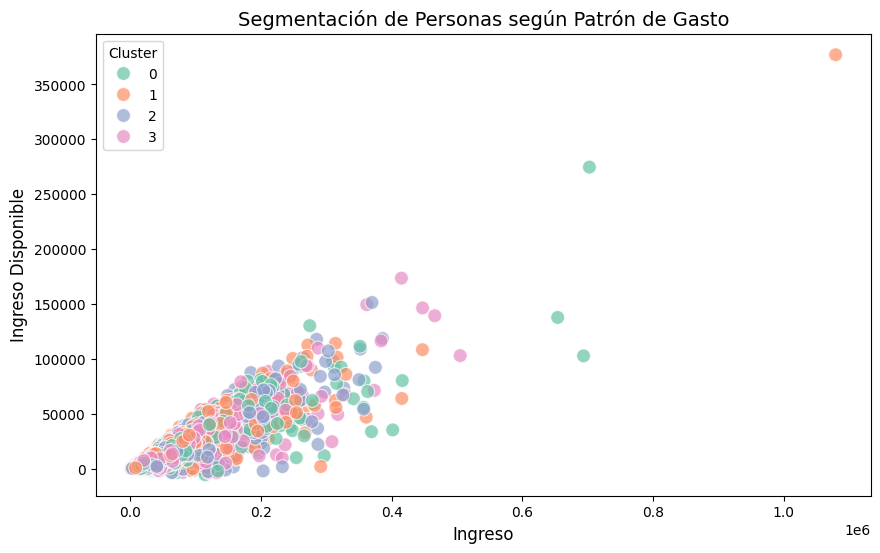

In [59]:
# Seleccionar las columnas de gasto (ajustar según tu dataset)
gasto_columns = ['Groceries_percentage', 'Transport_percentage', 'Eating_Out_percentage', 
                 'Entertainment_percentage', 'Utilities_percentage', 'Healthcare_percentage', 
                 'Education_percentage', 'Miscellaneous_percentage']

# Normalizar los datos
scaler = StandardScaler()
gasto_data = datos[gasto_columns]
gasto_data_scaled = scaler.fit_transform(gasto_data)

# Aplicar K-means (por ejemplo, 4 clusters)
kmeans = KMeans(n_clusters=4, random_state=42)
datos['Cluster'] = kmeans.fit_predict(gasto_data_scaled)

# Visualizar los clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=datos['Income'], y=datos['Disposable_Income'], hue=datos['Cluster'], palette='Set2', s=100, alpha=0.7)
plt.title('Segmentación de Personas según Patrón de Gasto', fontsize=14)
plt.xlabel('Ingreso', fontsize=12)
plt.ylabel('Ingreso Disponible', fontsize=12)
plt.legend(title='Cluster')
plt.show()

#### Oportunidades de ahorro

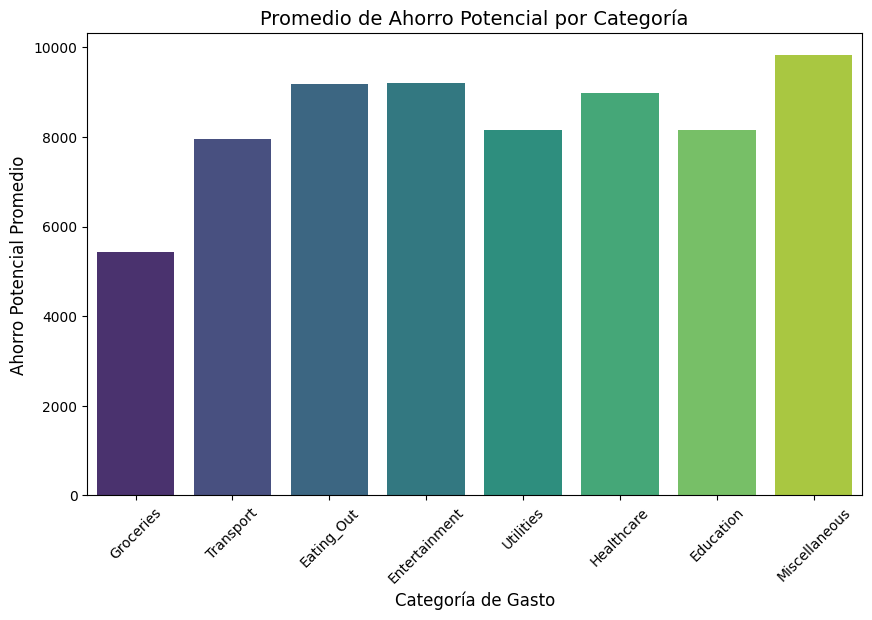

In [84]:
# Calcular el ahorro potencial por categoría
categories = ['Groceries', 'Transport', 'Eating_Out', 'Entertainment', 'Utilities', 'Healthcare', 'Education', 'Miscellaneous']

# Crear nuevas columnas para el ahorro potencial
for category in categories:
    datos[f'{category}_savings'] = datos['Disposable_Income'] - datos[category]

# Calcular el ahorro potencial total
datos['total_savings'] = datos[[
    f'{category}_savings' for category in categories
]].sum(axis=1)

# Evaluar la oportunidad de ahorro en términos de gasto
# Proporción de ahorro potencial sobre el gasto total de cada categoría
for category in categories:
    datos[f'{category}_savings_percentage'] = (datos[f'{category}_savings'] / datos[category]) * 100

# Análisis: ¿En qué categorías hay más oportunidad de ahorro?
category_savings = {category: datos[f'{category}_savings'].mean() for category in categories}

# Visualizar los ahorros potenciales por categoría
category_savings_df = pd.DataFrame(list(category_savings.items()), columns=['Category', 'Average_Savings'])

# Graficar los ahorros potenciales por categoría
plt.figure(figsize=(10, 6))
sns.barplot(data=category_savings_df, x='Category', y='Average_Savings', palette='viridis')
plt.title('Promedio de Ahorro Potencial por Categoría', fontsize=14)
plt.xlabel('Categoría de Gasto', fontsize=12)
plt.ylabel('Ahorro Potencial Promedio', fontsize=12)
plt.xticks(rotation=45)
plt.show()

#### Visualización avanzada

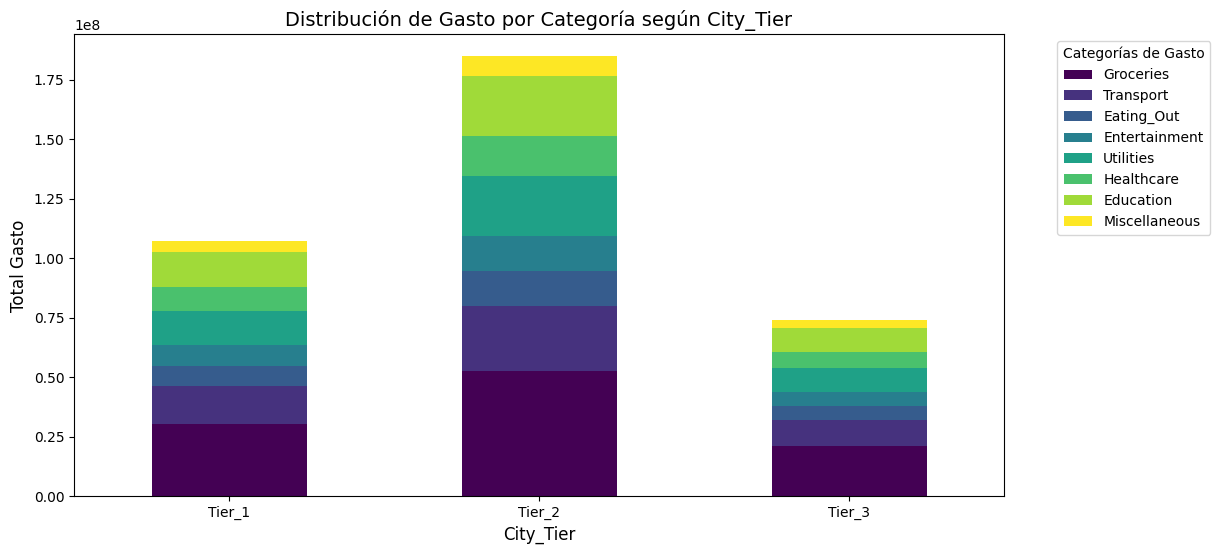

In [85]:
# Crear una tabla de gasto total por categoría y City_Tier
spend_by_tier = datos.groupby(['City_Tier'])[categories].sum()

# Crear un gráfico de barras apiladas
spend_by_tier.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Distribución de Gasto por Categoría según City_Tier', fontsize=14)
plt.xlabel('City_Tier', fontsize=12)
plt.ylabel('Total Gasto', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Categorías de Gasto', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

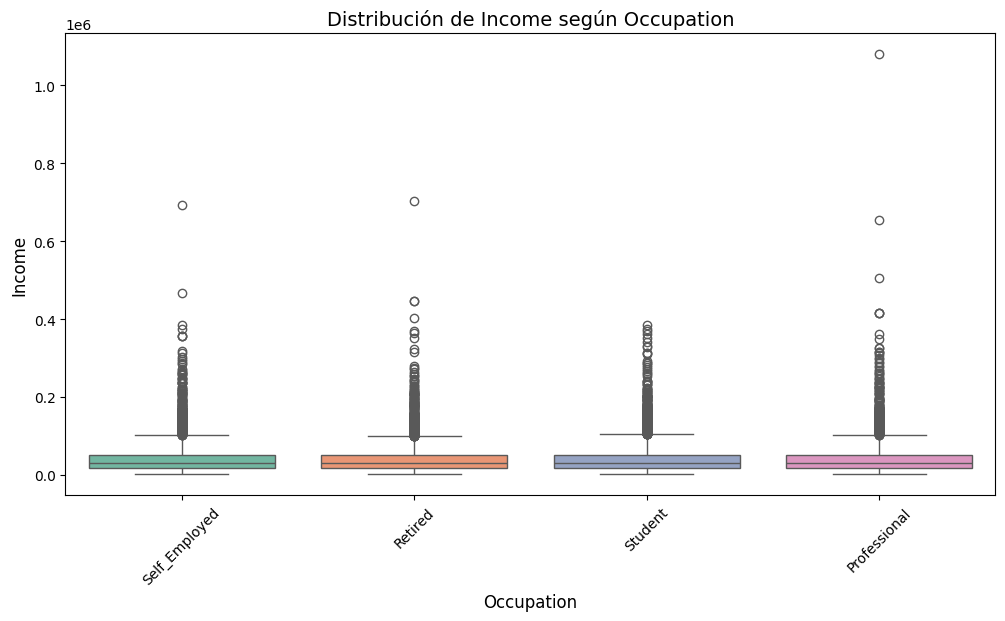

In [86]:
# Crear un diagrama de caja para 'Income' según 'Occupation'
plt.figure(figsize=(12, 6))
sns.boxplot(data=datos, x='Occupation', y='Income', palette='Set2')
plt.title('Distribución de Income según Occupation', fontsize=14)
plt.xticks(rotation=45)
plt.xlabel('Occupation', fontsize=12)
plt.ylabel('Income', fontsize=12)
plt.show()

### Gráficos generales

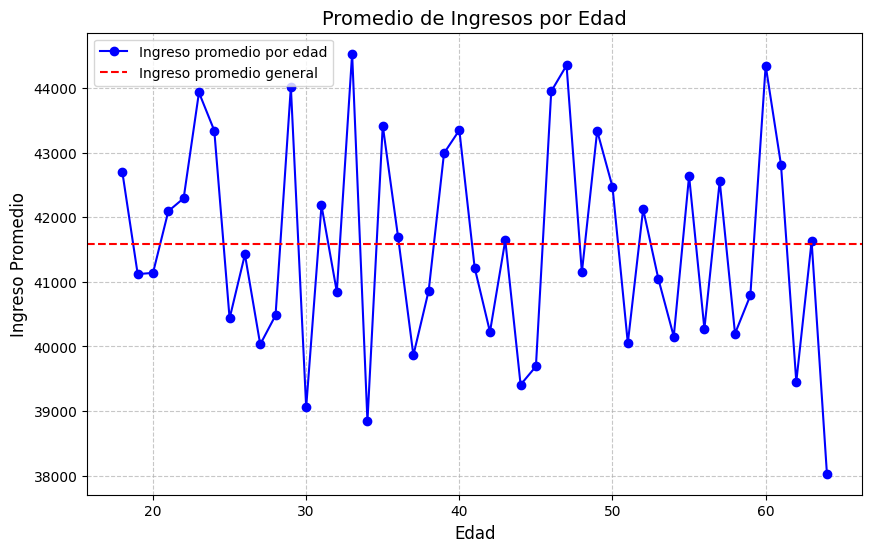

In [20]:
# Calcular el promedio de ingresos por edad
income_by_age = datos.groupby('Age')['Income'].mean()

# Calcular el ingreso promedio general
overall_mean_income = datos['Income'].mean()

# Crear el gráfico de línea
plt.figure(figsize=(10, 6))
plt.plot(income_by_age.index, income_by_age.values, marker='o', color='b', label='Ingreso promedio por edad')
plt.axhline(overall_mean_income, color='r', linestyle='--', label='Ingreso promedio general')
plt.title('Promedio de Ingresos por Edad', fontsize=14)
plt.xlabel('Edad', fontsize=12)
plt.ylabel('Ingreso Promedio', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

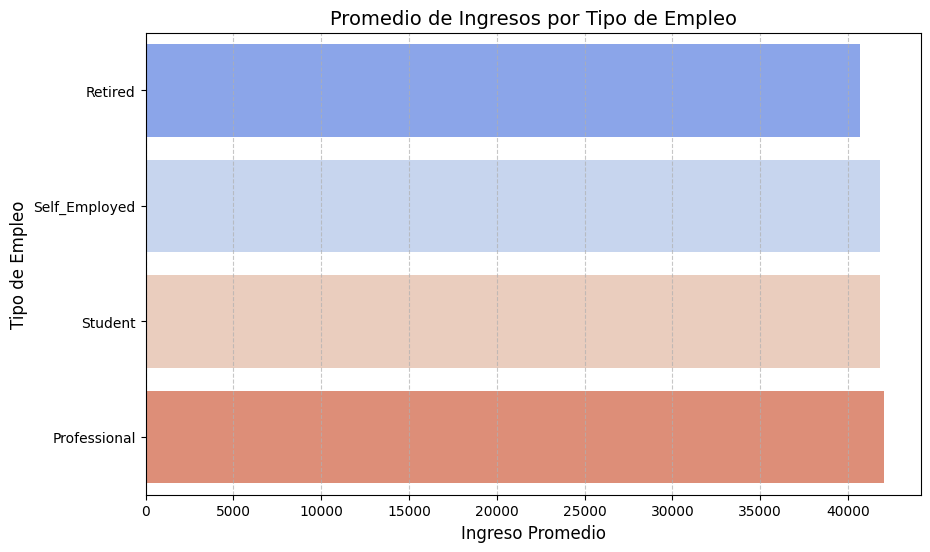

In [23]:
# Calcular el promedio de ingresos por tipo de empleo
income_by_occupation = datos.groupby('Occupation')['Income'].mean().sort_values()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=income_by_occupation.values, y=income_by_occupation.index, palette='coolwarm')
plt.title('Promedio de Ingresos por Tipo de Empleo', fontsize=14)
plt.xlabel('Ingreso Promedio', fontsize=12)
plt.ylabel('Tipo de Empleo', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

No parece que haya diferencias.

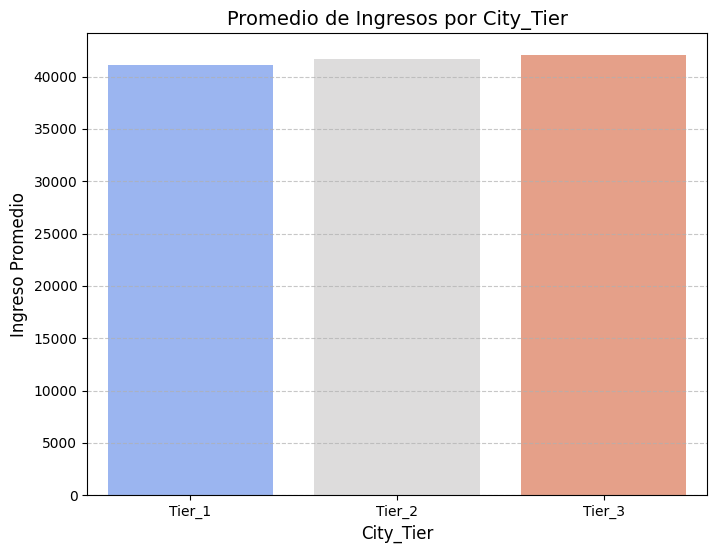

In [22]:
# Calcular el promedio de ingresos por City_Tier
income_by_city_tier = datos.groupby('City_Tier')['Income'].mean().sort_index()

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=income_by_city_tier.index, y=income_by_city_tier.values, palette='coolwarm')
plt.title('Promedio de Ingresos por City_Tier', fontsize=14)
plt.xlabel('City_Tier', fontsize=12)
plt.ylabel('Ingreso Promedio', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Tampoco parece que haya diferencias.

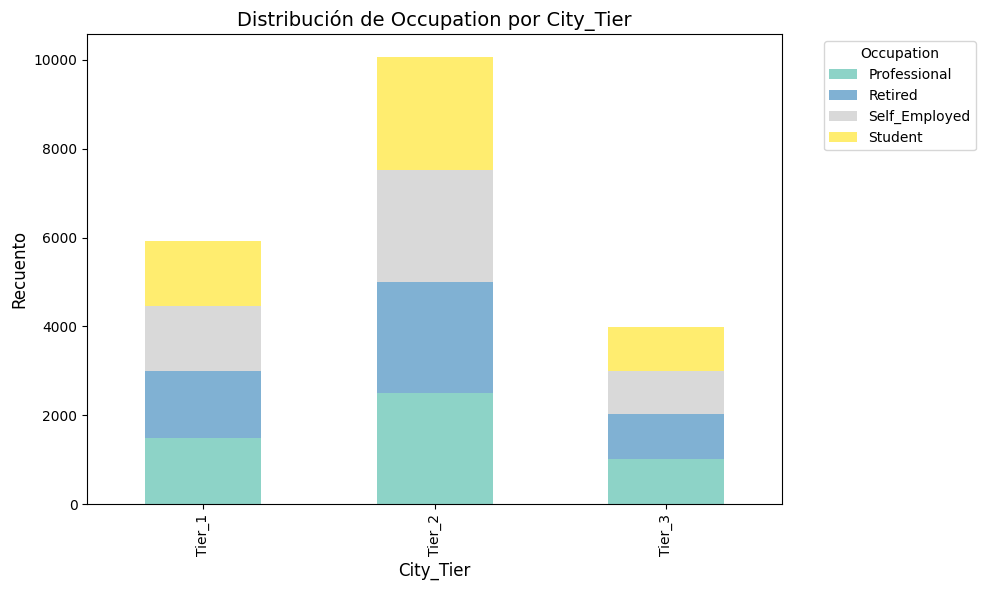

In [26]:
# Crear una tabla cruzada para Occupation y City_Tier
occupation_city_tier = datos.groupby(['City_Tier', 'Occupation']).size().unstack().fillna(0)

# Crear el gráfico apilado
occupation_city_tier.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set3')
plt.title('Distribución de Occupation por City_Tier', fontsize=14)
plt.xlabel('City_Tier', fontsize=12)
plt.ylabel('Recuento', fontsize=12)
plt.legend(title='Occupation', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

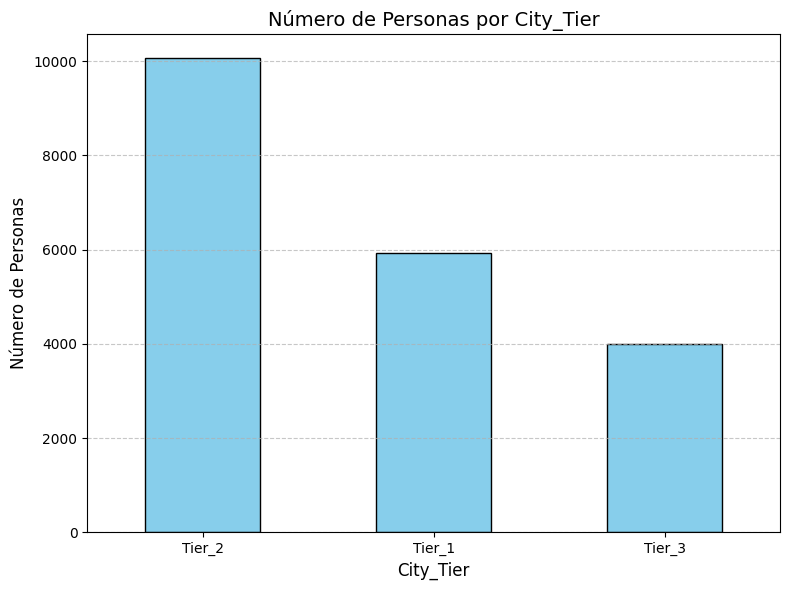

In [27]:
# Contar el número de personas por City_Tier
city_tier_counts = datos['City_Tier'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
city_tier_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Número de Personas por City_Tier', fontsize=14)
plt.xlabel('City_Tier', fontsize=12)
plt.ylabel('Número de Personas', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

La mayoría de personas son de clase media.